    Прочитайте данные из файла.
    Определите оптимальное количество кластеров для прочитанных данных.
    Постройте оптимальное разбиение на кластеры.
    Спрогнозируйте классы для векторов
    [-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]
    и
    [0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]

    Постройте график метрики "силуэт" в зависимости от количества кластеров.

### 1. Чтение данных из файла.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('X.csv', sep=' ', header=None)

In [3]:
df

,0,1,2,3,4
0,0.149014,0.097225,-0.424611,0.075148,0.107336
1,-0.041479,-0.115525,-0.126194,0.103934,0.168235
2,0.194307,-0.203077,-0.102814,-0.204007,0.324915
3,0.456909,0.183503,-0.240683,0.069676,0.316141
4,-0.070246,0.309300,-0.048386,0.087922,-0.413301
...,...,...,...,...,...
295,4.970333,4.554531,5.055404,4.804593,5.601828
296,5.275723,4.233824,4.595862,4.841415,5.618451
297,4.912918,5.280296,4.708516,5.175909,5.362510
298,5.080218,4.589936,5.360124,5.371485,5.307219


In [4]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler()
X_s = SC.fit_transform(df)

In [5]:
X_s

array([[0.2256986 , 0.14141356, 0.01660574, 0.08676375, 0.11190884],
       [0.19935417, 0.10734714, 0.03991917, 0.09147981, 0.12144213],
       [0.23196233, 0.09332795, 0.04174564, 0.04103024, 0.14596919],
       ...,
       [0.88452561, 0.97134908, 0.41762368, 0.92241235, 0.93456607],
       [0.90766248, 0.86080574, 0.46852962, 0.95445317, 0.92591067],
       [0.90991554, 0.91566976, 0.42499979, 0.89463893, 0.90564459]])

### 2. Определение оптимального количества кластеров для прочитанных данных.

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


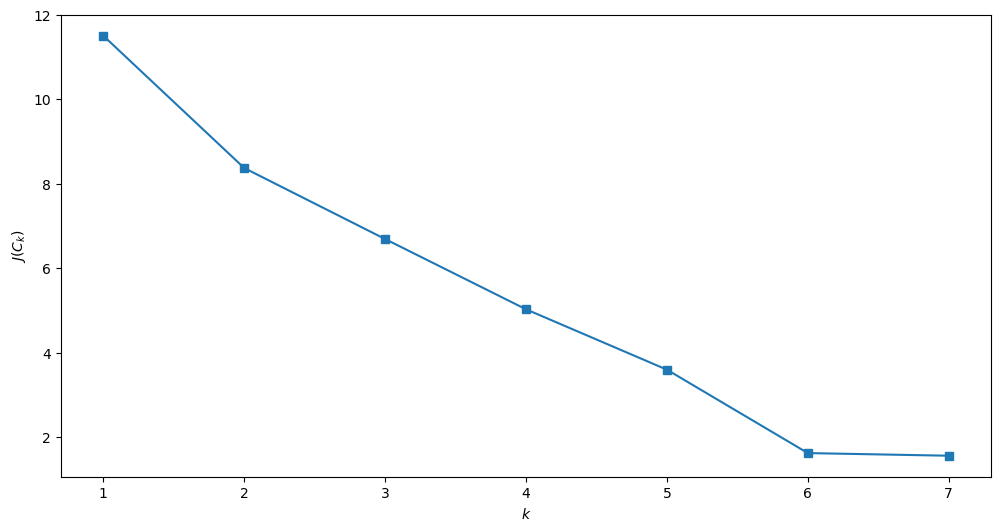

In [6]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_s)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [7]:
# Судя по графику оптимальное количество кластеров равно 6.

### 3. Строим оптимальное разбиение на кластеры.

In [8]:
kmeans = KMeans(n_clusters=6, random_state=1).fit(X_s)
kmeans.predict(X_s)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 4. Спрогнозируем классы для векторов
[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998]
и
[0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]

In [9]:
X_test = np.array([[-0.1805, -0.0659, -0.465199, 0.187700, -0.21910998], [0.2226875, -0.133287, 2.8845, 3.2772081, 2.93884]])
X_test

array([[-0.1805    , -0.0659    , -0.465199  ,  0.1877    , -0.21910998],
       [ 0.2226875 , -0.133287  ,  2.8845    ,  3.2772081 ,  2.93884   ]])

In [10]:
X_test1 = SC.transform(X_test)
X_test1

array([[0.18012822, 0.11529326, 0.01343488, 0.10520297, 0.06080618],
       [0.23588729, 0.10450296, 0.27512515, 0.61135155, 0.55515909]])

In [11]:
kmeans.predict(X_test1)

array([0, 2])

In [12]:
# Метрики
from sklearn import metrics
metrics.silhouette_score(X_s, kmeans.labels_)

0.8297279183180319

### 5. Построим график метрики "силуэт" в зависимости от количества кластеров.

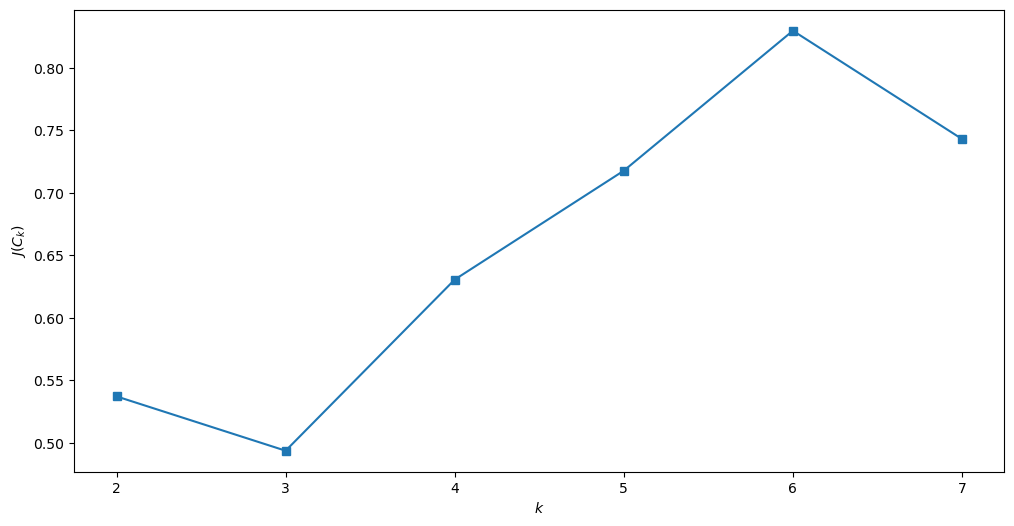

In [13]:
silhouette = []
for k in range(2, 8):
    kmeans1 = KMeans(n_clusters=k, random_state=1).fit(X_s)
    silhouette.append(metrics.silhouette_score(X_s, kmeans1.labels_))

plt.plot(range(2, 8), silhouette, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [ ]:
# По графику метрики "силуэт" также видно что оптимальное количество кластеров равно 6